## Inteligência Artificial 2024.1 : Prova N1 - 1o Bimestre 

### Nome: Lucas Pires Savassa

### RA: 082190035

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Base de dados :

In [3]:
base = pd.read_excel('Base_N1_B1_2024.1.xlsx')
base

,Feature1,Feature2,Label
0,0.000,5.472986,Red
1,0.005,4.326074,Red
2,0.010,5.257439,Red
3,0.015,3.321764,Red
4,0.020,5.783143,Red
...,...,...,...
795,2.125,2.760104,Blue
796,2.130,3.526581,Blue
797,2.135,3.404561,Blue
798,2.140,3.633677,Blue


## Desenvolvimento do classificador :

### Objetivo

Aprender a classificar dados sem conhecer a sua natureza ou contexto

### 1º passo: visualizar os dados

Justificativa: Para entender o problema, procurei primeiro visualizar os dados e anotar insights:

In [4]:
base[["Feature1", "Feature2"]].describe()

,Feature1,Feature2
count,800.000000,800.000000
mean,1.072500,3.588866
std,0.582564,3.133176
min,0.000000,-3.353179
25%,0.573750,0.712466
50%,1.072500,3.553948
75%,1.571250,6.438598
max,2.145000,9.963324


[1]: A feature 1 parece existir no domínio dos números reais positivos <br>
[2]: A feature 2 parece existir no domínio dos números reais <br>
<br>
_a análise estatística individual das features não tem muito significado_

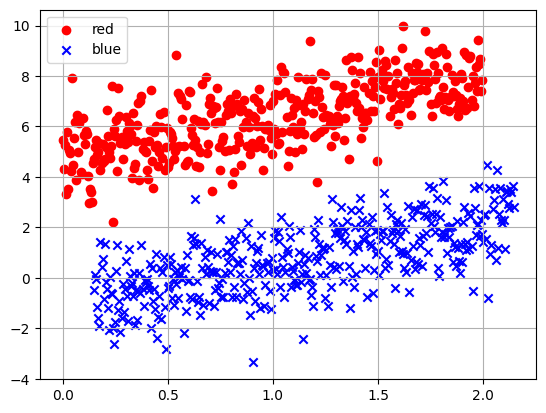

In [10]:
red = base[base["Label"] == "Red"]
blue = base[base["Label"] == "Blue"]

figure, axes = plt.subplots()

axes.scatter(red[["Feature1"]], red[["Feature2"]], label="red", color="red", marker="o")
axes.scatter(blue[["Feature1"]], blue[["Feature2"]], label="blue", color="blue", marker="x")
axes.legend()
axes.grid()


[3]: As duas features parecem se distribuir linearmente. <br>
[4]: As duas categorias parecem formar clusters naturais, porém há outliers

### 2º passo: encontrar a melhor reta para cada categoria

Justificativa: quero identificar estatisticamente quem são os outliers em cada categoria. Para isso pretendo encontrar a melhor reta usando regressão linear, e discriminar como outliers os pontos que estão a mais de 3 desvio-padrão de distância da reta.

#### Encontrando uma reta para a categoria Red

w1: 0.7203244934421581 w0: 0.417022004702574


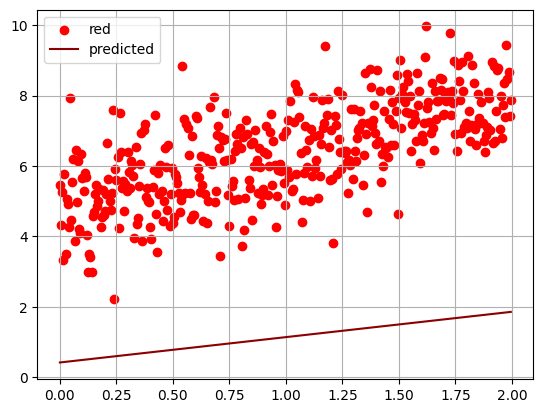

In [20]:
x = np.array(red[["Feature1"]])
y = np.array(red[["Feature2"]])

np.random.seed(1)
w0 = np.random.rand()
w1 = np.random.rand()
print("w1: " + str(w1), "w0: " + str(w0))

yp = x * w1 + w0

figure, axes = plt.subplots()
axes.scatter(x, y, label="red", color="red", marker="o")
axes.plot(x, yp, label="predicted", color="darkred")
axes.legend()
axes.grid()

In [21]:
costs = []
iterations = 1000
alpha = 0.01

for i in range(iterations):
    yp = x * w1 + w0
    error = (yp - y) ** 2
    N = len(error)
    
    costs.append(np.sum(error) / N)
    
    d0 = 2 * np.sum(yp - y) / N
    w0 = w0 - (alpha * d0)
    d1 = 2 * np.sum(x * (yp - y)) / N
    w1 = w1 - (alpha * d1)

w1: 1.7014677308355943 w0: 4.691774674591119


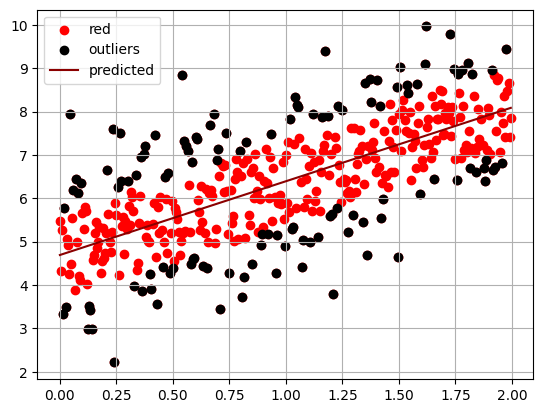

In [22]:
yp = np.multiply(x, w1) + w0

distances = (yp - y) ** 2
mse = np.sqrt(np.sum(distances) / len(distances))
outliers = np.abs(yp - y) > (1 * mse)
red_x_out = x[outliers]
red_y_out = y[outliers]

print("w1: " + str(w1), "w0: " + str(w0))

figure, axes = plt.subplots()
axes.scatter(x, y, label="red", color="red", marker="o")
axes.scatter(red_x_out, red_y_out, label="outliers", color="black")
axes.plot(x, yp, label="predicted", color="darkred")
axes.legend()
axes.grid()

#### Encontrando uma reta para a categoria Blue

w1: 0.025926231827891333 w0: 0.43599490214200376


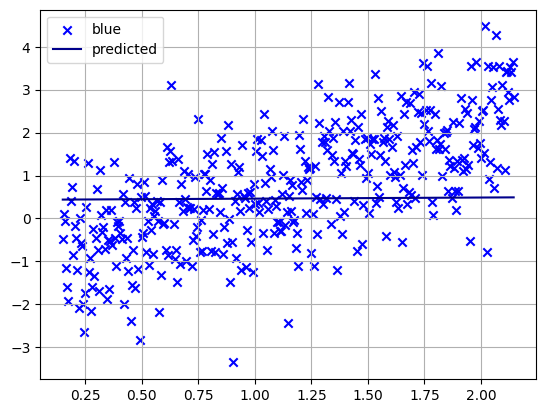

In [23]:
x = np.array(blue[["Feature1"]])
y = np.array(blue[["Feature2"]])

np.random.seed(2)
w0 = np.random.rand()
w1 = np.random.rand()
print("w1: " + str(w1), "w0: " + str(w0))

yp = (x * w1) + w0

figure, axes = plt.subplots()
axes.scatter(x, y, label="blue", color="blue", marker="x")
axes.plot(x, yp, label="predicted", color="darkblue")
axes.legend()
axes.grid()

In [24]:
costs = []
iterations = 1000
alpha = 0.01

for i in range(iterations):
    yp = x * w1 + w0
    error = (yp - y) ** 2
    N = len(error)
    
    costs.append(np.sum(error) / N)
    
    d0 = 2 * np.sum(yp - y) / N
    w0 = w0 - alpha * d0
    d1 = 2 * np.sum(x * (yp - y)) / N
    w1 = w1 - alpha * d1

w1: 1.5020888378265655 w0: -0.9339362391746293


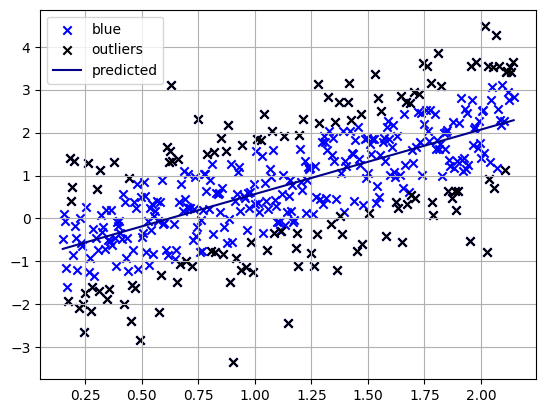

In [25]:
yp = x * w1 + w0

distances = (yp - y) ** 2
mse = np.sqrt(np.sum(distances) / len(distances))
outliers = np.abs(yp - y) > (1 * mse)
blue_x_out = x[outliers]
blue_y_out = y[outliers]

print("w1: " + str(w1), "w0: " + str(w0))

figure, axes = plt.subplots()
axes.scatter(x, y, label="blue", color="blue", marker="x")
axes.scatter(blue_x_out, blue_y_out, label="outliers", color="black", marker="x")
axes.plot(x, yp, label="predicted", color="darkblue")
axes.legend()
axes.grid()

#### Conclusão

Um classificador linear é uma técnica de aprendizagem adequada para esse problema. Vale apena criar dois classificadores, um que inclui outliers durante a aprendizagem, e outro que os exclui. Para avaliar a precisão dos dois classificadores, vou separar 20% dos dados e usá-los para estimar a precisão medindo a porcentagem de dados classificados corretamente.

### 3º passo: criar classificador incluindo outliers na aprendizagem

## Desenvolvimento do estimador :

## Conclusão :